# Null weak singularities in plane-symmetric spacetimes Ori
##  Geoff Cope
##  Univeristy of Utah
## January 1, 2021

https://arxiv.org/pdf/gr-qc/9801086

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,x,y,du,dv,dx,dy = symbols( 'u v x y du dv dx dy' ) 

In [4]:
U = Function('U')(u,v)
U

In [5]:
V = Function('V')(u,v)
V

In [6]:
M = Function('M')(u,v)
M

In [8]:
variables = Matrix( [u,v,x,y] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [9]:
differentials = Matrix( [du,dv,dx,dy] ) 
differentials

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [10]:
lineElement = expand( -exp(-M)*du*dv + exp(-U)* ( exp(V)*dx**2 + exp(-V)*dy**2 ) ) 
lineElement

In [11]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡               -M(u, v)                                          ⎤
⎢             -ℯ                                                  ⎥
⎢     0       ───────────          0                    0         ⎥
⎢                  2                                              ⎥
⎢                                                                 ⎥
⎢  -M(u, v)                                                       ⎥
⎢-ℯ                                                               ⎥
⎢───────────       0               0                    0         ⎥
⎢     2                                                           ⎥
⎢                                                                 ⎥
⎢                           -U(u, v)  V(u, v)                     ⎥
⎢     0            0       ℯ        ⋅ℯ                  0         ⎥
⎢                                                                 ⎥
⎢                                               -U(u, v)  -V(u, v)⎥
⎣     0            0               0           ℯ

In [12]:
import sympy

In [13]:
m = sympy.Array(g)
m

⎡               -M(u, v)                                          ⎤
⎢             -ℯ                                                  ⎥
⎢     0       ───────────          0                    0         ⎥
⎢                  2                                              ⎥
⎢                                                                 ⎥
⎢  -M(u, v)                                                       ⎥
⎢-ℯ                                                               ⎥
⎢───────────       0               0                    0         ⎥
⎢     2                                                           ⎥
⎢                                                                 ⎥
⎢                           -U(u, v)  V(u, v)                     ⎥
⎢     0            0       ℯ        ⋅ℯ                  0         ⎥
⎢                                                                 ⎥
⎢                                               -U(u, v)  -V(u, v)⎥
⎣     0            0               0           ℯ

In [14]:
from einsteinpy.symbolic import *

In [18]:
syms = sympy.symbols("u v x y")
u,v,x,y = syms

In [20]:
metric = MetricTensor(m,syms)

In [21]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡ ∂                                                                                        
⎢⎢-──(M(u, v))  0                                       0                                   
⎢⎢ ∂u                                                                                       
⎢⎢                                                                                          
⎢⎢     0        0                                       0                                   
⎢⎢                                                                                          
⎢⎢                  ⎛ -U(u, v)  V(u, v) ∂              -U(u, v)  V(u, v) ∂          ⎞  M(u, 
⎢⎢     0        0  -⎜ℯ        ⋅ℯ       ⋅──(U(u, v)) - ℯ        ⋅ℯ     

In [22]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                             2                               2             
⎢                                ⎛∂          ⎞                   ⎛∂          ⎞            ∂ 
⎢                                ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟            ──
⎢      ∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠            ∂u
⎢      ──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────         - ──
⎢      ∂u          ∂u                  2            2                  2                    
⎢                                                 ∂u                                        
⎢                                                                                           
⎢                                                                                           
⎢  ∂           ∂             ∂           ∂                                                  
⎢  ──(U(u, v))⋅──(U(u, v))   ──(V(u, v))⋅──(V(u, v))      2           

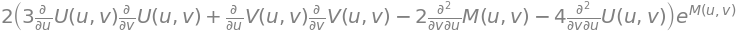

In [23]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [24]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                       2                               2                   
⎢                          ⎛∂          ⎞                   ⎛∂          ⎞                    
⎢                          ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟                    
⎢∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠                    
⎢──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────                1.0
⎢∂u          ∂u                  2            2                  2                          
⎢                                           ∂u                                              
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                               2                     

In [25]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [26]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [27]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                       2                               2                   
⎢                          ⎛∂          ⎞                   ⎛∂          ⎞                    
⎢                          ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟                    
⎢∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠                    
⎢──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────                1.0
⎢∂u          ∂u                  2            2                  2                          
⎢                                           ∂u                                              
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                               2                     

In [28]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified 

⎡                                             2                               2             
⎢                                ⎛∂          ⎞                   ⎛∂          ⎞            ∂ 
⎢                                ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟            ──
⎢      ∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠            ∂u
⎢      ──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────         - ──
⎢      ∂u          ∂u                  2            2                  2                    
⎢                                                 ∂u                                        
⎢                                                                                           
⎢                                                                                           
⎢  ∂           ∂             ∂           ∂                                                  
⎢  ──(U(u, v))⋅──(U(u, v))   ──(V(u, v))⋅──(V(u, v))      2           

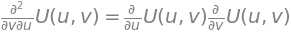

In [38]:
equation16a = Eq( diff(U,u,v) , solve( einsteinSimplified[1,0], diff(U,u,v) )[0] ) 
equation16a

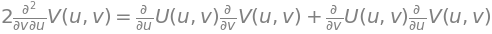

In [47]:
equation16b = Eq( 2* diff(V,u,v) ,2 * solve( simplify( ricciSimplified[2,2].args[0] - ricciSimplified[3,3].args[0] ), diff(V,u,v) )[0] )
equation16b

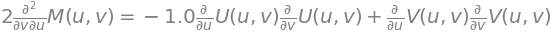

In [59]:
equation16c = Eq( 2* diff(M,u,v) , 2* solve( simplify( einsteinSimplified[2,2].args[0] + einsteinSimplified[3,3].args[0] ).subs(equation16a.args[0],equation16a.args[1]) , diff(M,u,v) )[0])
equation16c

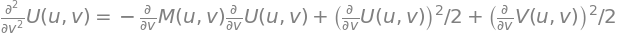

In [36]:
equation17a = Eq(diff(U,v,v),solve( einsteinSimplified[1,1] , diff(U,v,v) )[0] ) 
equation17a

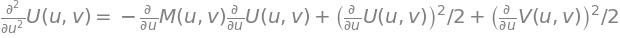

In [37]:
equation17b = Eq( diff(U,u,u)  , solve( einsteinSimplified[0,0] , diff(U,u,u) )[0] )
equation17b

In [61]:
vacuumFieldEquations = Matrix([equation16a,equation16b,equation16c,equation17a,equation17b])
vacuumFieldEquations

⎡                    2                                                     ⎤
⎢                   ∂              ∂           ∂                           ⎥
⎢                 ─────(U(u, v)) = ──(U(u, v))⋅──(U(u, v))                 ⎥
⎢                 ∂v ∂u            ∂u          ∂v                          ⎥
⎢                                                                          ⎥
⎢        2                                                                 ⎥
⎢       ∂              ∂           ∂             ∂           ∂             ⎥
⎢   2⋅─────(V(u, v)) = ──(U(u, v))⋅──(V(u, v)) + ──(U(u, v))⋅──(V(u, v))   ⎥
⎢     ∂v ∂u            ∂u          ∂v            ∂v          ∂u            ⎥
⎢                                                                          ⎥
⎢       2                                                                  ⎥
⎢      ∂                ∂           ∂             ∂           ∂            ⎥
⎢  2⋅─────(M(u, v)) = - ──(U(u, v))⋅──(U(u, v)) + ──(V(u, v))⋅──(V(u, v))  ⎥